In [1]:
from osbrain import run_agent
from osbrain import run_nameserver
import random


In [2]:
#------------------------------------------------------------------

# Nuwan's Details
    
nuwansWealth = random.randint(5000000,7000000)
nuwansSalary = 50000
nuwansExpenses = 0

bought_a_land = False
built_a_house = False
carpentering_done = False
painting_done = False
bought_a_car = False
life_is_completed = False

building_happening = False
carpentering_happening = False
painting_happening = False

def introduction(agent):
    agent.log_info("I have "+  str(nuwansWealth)+ " much of money")
    agent.log_info("I need to buy a land, build a house and buy a car")
    agent.log_info("I got a job with a monthly salary of " + str(nuwansSalary))
    agent.log_info("I have no monthly expenses yet")
    agent.log_info("--------------------------------------------------------")
    agent.log_info("I found a land but the land price increases every month")
    agent.log_info("--------------------------------------------------------")

def gotASalary(agent):
    global nuwansWealth
    nuwansWealth += (nuwansSalary - nuwansExpenses)
    agent.log_info("I got my salary. Now I have " + str(nuwansWealth))
    
def buyTheLand(agent,amount,expenses):
    global nuwansWealth
    global bought_a_land
    global nuwansExpenses
    nuwansWealth -= amount
    nuwansExpenses += expenses
    agent.log_info("Yes!. I bought the land. Now I have " + str(nuwansWealth))
    bought_a_land = True
    
def buyTheCar(agent,amount,expenses):
    global nuwansWealth
    global bought_a_car
    global nuwansExpenses
    global life_is_completed
    nuwansWealth -= amount
    nuwansExpenses += expenses
    agent.log_info("Yes!. I bought the car. Now I have " + str(nuwansWealth))
    agent.log_info("Now. My life is completed !!!!!!!!!")
    bought_a_car = True
    life_is_completed = True
    
def houseBuilt(agent):
    global built_a_house
    built_a_house = True
    agent.log_info("Yes!. I have half completed house. Need to start carpetering. Now I have " + str(nuwansWealth))

def houseCarpentered(agent):
    global carpentering_done
    carpentering_done = True
    agent.log_info("Yes!. I have almost completed house. Need to start painting. Now I have " + str(nuwansWealth))

def housePainted(agent):
    global painting_done
    painting_done = True
    agent.log_info("Yes!!!. I have a completed house. Need to buy a car. Now I have " + str(nuwansWealth))

    
#------------------------------------------------------------------
    
# Land Owner's (ls) Details

lsWealth = 0
landPrice = random.randint(5000000,7500000)
landMaintainanceCost = 10000
land_sold = False

def landPriceIncrease(agent):
    global landPrice
    global land_sold
    
    if not land_sold :
        landPrice += 20000
        agent.log_info("Land price is now " + str(landPrice))
    
def sellLand(agent):
    global lsWealth
    global land_sold
    
    lsWealth = landPrice
    land_sold = True
    agent.log_info("Sold the land to Nuwan. I have now "+ str(lsWealth))
    
def sendLandPrice(agent,_):
    return landPrice

def sendLandMaintainanceCost(agent,_):
    return landMaintainanceCost

#------------------------------------------------------------------
    
# Builder's  Details

buildersWealth = 0
buildersSalary = random.randint(40000,60000)
buildersMonthsToBuild = random.randint(5,10)
    
def building_the_house(agent):
    global buildersWealth
    global buildersMonthsToBuild
    
    buildersWealth += buildersSalary
    buildersMonthsToBuild -= 1
    
    if buildersMonthsToBuild == 0 :
        agent.log_info("I finished the house. From building Nuwan's house now I have "+ str(buildersWealth))
    else:
        agent.log_info("I did a months work. I got a salary. Now I have "+ str(buildersWealth))
        agent.log_info( str(buildersMonthsToBuild) + " months remaining to finish.")
    
    return buildersMonthsToBuild

def sendBuildersSalary(agent,_):
    return buildersSalary

#------------------------------------------------------------------

# Carpenter's Details

carpentersWealth = 0
carpentersSalary = random.randint(40000,60000)
carpentersMonthsToBuild = random.randint(2,5)

def carpentering_the_house(agent):
    global carpentersWealth
    global carpentersMonthsToBuild
    
    carpentersWealth += carpentersSalary
    carpentersMonthsToBuild -= 1
    
    if carpentersMonthsToBuild == 0 :
        agent.log_info("I finished carpentering the house. From carpentering Nuwan's house now I have "+ str(carpentersWealth))
    else:
        agent.log_info("I did a months work. I got a salary. Now I have "+ str(carpentersWealth))
        agent.log_info(str(carpentersMonthsToBuild)+" months remaining to finish.")
    
    return carpentersMonthsToBuild

def sendCarpentersSalary(agent,_):
    return carpentersSalary
                              
#------------------------------------------------------------------

# Painter's Details

paintersWealth = 0
paintersSalary = random.randint(20000,30000)
paintersMonthsToPaint = 1

def painting_the_house(agent):
    global paintersWealth
    global paintersMonthsToPaint
    
    paintersWealth += paintersSalary
    paintersMonthsToPaint -= 1
    
    if paintersMonthsToPaint == 0 :
        agent.log_info("I finished painting the house. From painting Nuwan's house now I have "+ str(paintersWealth))
    else:
        agent.log_info("I did a months work. I got a salary. Now I have "+ str(paintersWealth))
        agent.log_info(str(paintersMonthsToPaint) +" months remaining to finish.")

    return paintersMonthsToPaint

def sendPaintersSalary(agent,_):
    return paintersSalary

#------------------------------------------------------------------

# CarSale's Details

carSalesWealth = 0
carPrice = random.randint(5000000,7500000)
carMaintainanceCost = 15000

def sellCar(agent):
    global carSalesWealth
    
    carSalesWealth = carPrice
    agent.log_info("Sold the car to Nuwan. I have now "+ str(carSalesWealth))

def sendCarPrice(agent,_):
    return carPrice

def sendCarMaintainanceCost(agent,_):
    return carMaintainanceCost
    
#------------------------------------------------------------------

wealth = [[],[],[],[],[],[]]


In [3]:
if __name__ == '__main__':
    

    # System deployment
    ns = run_nameserver()
    
    # Agents
    nuwan = run_agent('Nuwan')
    landOwner = run_agent('LandOwner')
    builder = run_agent('Builder')
    carpenter = run_agent('Carpenter')
    painter = run_agent('Painter')
    carSale = run_agent('CarSale')
    
    addr = landOwner.bind('REP', alias='getLandMaintainanceCost', handler=sendLandMaintainanceCost)
    nuwan.connect(addr, alias='getLandMaintainanceCost')
    
    addr = landOwner.bind('REP', alias='getLandPrice', handler=sendLandPrice)
    nuwan.connect(addr, alias='getLandPrice')
    
    addr = builder.bind('REP', alias='getBuildersSalary', handler=sendBuildersSalary)
    nuwan.connect(addr, alias='getBuildersSalary')
    
    addr = carpenter.bind('REP', alias='getCarpentersSalary', handler=sendCarpentersSalary)
    nuwan.connect(addr, alias='getCarpentersSalary')
      
    addr = painter.bind('REP', alias='getPaintersSalary', handler=sendPaintersSalary)
    nuwan.connect(addr, alias='getPaintersSalary')
 
    addr = carSale.bind('REP', alias='getCarMaintainanceCost', handler=sendCarMaintainanceCost)
    nuwan.connect(addr, alias='getCarMaintainanceCost')
    
    addr = carSale.bind('REP', alias='getCarPrice', handler=sendCarPrice)
    nuwan.connect(addr, alias='getCarPrice')
    
    introduction(nuwan)
    
    
    global wealth
    global nuwansWealth
    
    while(not life_is_completed):
        
        
        gotASalary(nuwan)
        
        wealth[0].append(nuwansWealth)
        wealth[1].append(lsWealth)
        wealth[2].append(buildersWealth)
        wealth[3].append(carpentersWealth)
        wealth[4].append(paintersWealth)
        wealth[5].append(carSalesWealth)
    
        if not bought_a_land:
            
            landPriceIncrease(landOwner)
            nuwan.send('getLandPrice',"_")
            price = int(nuwan.recv('getLandPrice'))
            
            if price < nuwansWealth:
                nuwan.log_info("I have enough money to buy the land")
                nuwan.send('getLandMaintainanceCost',"_")
                cost = int(nuwan.recv('getLandMaintainanceCost'))
                buyTheLand(nuwan,price,cost)
                sellLand(landOwner)
                
                nuwan.log_info("Now I have a land need to build a house")
            
            else:
                nuwan.log_info("I don't have enough money to buy the land")
                nuwan.log_info("I need to wait")
            
            continue
            
        
        if not built_a_house:
            
            global building_happening 
            
            nuwan.send('getBuildersSalary',"_")
            builderSalary = int(nuwan.recv('getBuildersSalary'))
            
            if builderSalary < nuwansWealth:
                
                if not building_happening:
                    nuwan.log_info("I found a builder to build the house")
                    building_happening = True

                days = building_the_house(builder)
                
                nuwansWealth -= builderSalary
                
                if days == 0:
                    houseBuilt(nuwan)
            else:
                nuwan.log_info("Builder is asking "+str(builderSalary))
                nuwan.log_info("I don't have enough money to pay the builder")
                nuwan.log_info("I need to wait")
            
            
            continue
            
        if not carpentering_done:
            
            global carpentering_happening 
            
            nuwan.send('getCarpentersSalary',"_")
            carpentersSalary = int(nuwan.recv('getCarpentersSalary'))
            
            if carpentersSalary < nuwansWealth:
                
                if not carpentering_happening:
                    nuwan.log_info("I found a carpenter to build the house")
                    
                    carpentering_happening = True
                
                days = carpentering_the_house(carpenter)
                
                nuwansWealth -= carpentersSalary
                
                if days == 0:
                    houseCarpentered(nuwan)
            else:
                nuwan.log_info("Builder is asking "+str(carpentersSalary))
                nuwan.log_info("I don't have enough money to pay the carpenter")
                nuwan.log_info("I need to wait")
            
            
            continue
                
        if not painting_done:
            
            global painting_happening 
            
            nuwan.send('getPaintersSalary',"_")
            paintersSalary = int(nuwan.recv('getPaintersSalary'))
            
            if paintersSalary < nuwansWealth:
                
                if not painting_happening:
                    nuwan.log_info("I found a painter to build the house")
                    
                    painting_happening = True
                
                days = painting_the_house(painter)
                
                nuwansWealth -= paintersSalary
                
                if days == 0:
                    housePainted(nuwan)
            else:
                nuwan.log_info("Builder is asking "+str(paintersSalary))
                nuwan.log_info("I don't have enough money to pay the painter")
                nuwan.log_info("I need to wait")
        
            
            continue
                    
        if not bought_a_car:
            
            nuwan.send('getCarPrice',"_")
            carPrice = int(nuwan.recv('getCarPrice'))
            
            if carPrice < nuwansWealth:
                nuwan.log_info("I have enough money to buy the car")
                nuwan.send('getCarMaintainanceCost',"_")
                cost = int(nuwan.recv('getCarMaintainanceCost'))
                buyTheCar(nuwan,carPrice,cost)
                sellCar(carSale)
                
                nuwan.log_info("Now I have a car")
            
            else:
                nuwan.log_info("Car price is "+str(carPrice))
                nuwan.log_info("I don't have enough money to buy the car")
                nuwan.log_info("I need to wait")
            
            wealth[0].append(nuwansWealth)
            wealth[1].append(lsWealth)
            wealth[2].append(buildersWealth)
            wealth[3].append(carpentersWealth)
            wealth[4].append(paintersWealth)
            wealth[5].append(carSalesWealth)
        
            continue
        
    ns.shutdown()


Broadcast server running on 0.0.0.0:9091
NS running on 127.0.0.1:10697 (127.0.0.1)
URI = PYRO:Pyro.NameServer@127.0.0.1:10697
INFO [2020-10-24 07:24:22.583715] (Nuwan): I have 6436667 much of money
INFO [2020-10-24 07:24:22.586511] (Nuwan): I need to buy a land, build a house and buy a car
INFO [2020-10-24 07:24:22.588647] (Nuwan): I got a job with a monthly salary of 50000
INFO [2020-10-24 07:24:22.590990] (Nuwan): I have no monthly expenses yet
INFO [2020-10-24 07:24:22.593249] (Nuwan): --------------------------------------------------------
INFO [2020-10-24 07:24:22.595288] (Nuwan): I found a land but the land price increases every month
INFO [2020-10-24 07:24:22.597209] (Nuwan): --------------------------------------------------------
INFO [2020-10-24 07:24:22.599181] (Nuwan): I got my salary. Now I have 6486667
INFO [2020-10-24 07:24:22.601260] (LandOwner): Land price is now 6896693
INFO [2020-10-24 07:24:22.605896] (Nuwan): I don't have enough money to buy the land
INFO [2020-10

INFO [2020-10-24 07:24:22.898946] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:22.900919] (Nuwan): I need to wait
INFO [2020-10-24 07:24:22.903001] (Nuwan): I got my salary. Now I have 315046
INFO [2020-10-24 07:24:22.906814] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:22.908947] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:22.910686] (Nuwan): I need to wait
INFO [2020-10-24 07:24:22.912988] (Nuwan): I got my salary. Now I have 355046
INFO [2020-10-24 07:24:22.916695] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:22.918695] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:22.921162] (Nuwan): I need to wait
INFO [2020-10-24 07:24:22.922988] (Nuwan): I got my salary. Now I have 395046
INFO [2020-10-24 07:24:22.926441] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:22.928156] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:22.929622] (Nuwan): I need to wait
INFO [

INFO [2020-10-24 07:24:23.184746] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.187661] (Nuwan): I need to wait
INFO [2020-10-24 07:24:23.189603] (Nuwan): I got my salary. Now I have 1475046
INFO [2020-10-24 07:24:23.193276] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.195488] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.197448] (Nuwan): I need to wait
INFO [2020-10-24 07:24:23.199240] (Nuwan): I got my salary. Now I have 1515046
INFO [2020-10-24 07:24:23.202973] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.204874] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.207020] (Nuwan): I need to wait
INFO [2020-10-24 07:24:23.209177] (Nuwan): I got my salary. Now I have 1555046
INFO [2020-10-24 07:24:23.212818] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.214857] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.216663] (Nuwan): I need to wait
INF

INFO [2020-10-24 07:24:23.450905] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.454897] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.457625] (Nuwan): I need to wait
INFO [2020-10-24 07:24:23.459796] (Nuwan): I got my salary. Now I have 2635046
INFO [2020-10-24 07:24:23.463457] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.465419] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.467319] (Nuwan): I need to wait
INFO [2020-10-24 07:24:23.471725] (Nuwan): I got my salary. Now I have 2675046
INFO [2020-10-24 07:24:23.475568] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.477528] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.479457] (Nuwan): I need to wait
INFO [2020-10-24 07:24:23.481165] (Nuwan): I got my salary. Now I have 2715046
INFO [2020-10-24 07:24:23.484333] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.489872] (Nuwan): I don't have enough money to buy the c

INFO [2020-10-24 07:24:23.733287] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.735514] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.737665] (Nuwan): I need to wait
INFO [2020-10-24 07:24:23.739785] (Nuwan): I got my salary. Now I have 3795046
INFO [2020-10-24 07:24:23.743030] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.744927] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.746674] (Nuwan): I need to wait
INFO [2020-10-24 07:24:23.748396] (Nuwan): I got my salary. Now I have 3835046
INFO [2020-10-24 07:24:23.751496] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.753722] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:23.756028] (Nuwan): I need to wait
INFO [2020-10-24 07:24:23.758346] (Nuwan): I got my salary. Now I have 3875046
INFO [2020-10-24 07:24:23.761596] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:23.763526] (Nuwan): I don't have enough money to buy the c

INFO [2020-10-24 07:24:24.005869] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:24.007733] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:24.009509] (Nuwan): I need to wait
INFO [2020-10-24 07:24:24.011473] (Nuwan): I got my salary. Now I have 4955046
INFO [2020-10-24 07:24:24.014937] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:24.016674] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:24.018796] (Nuwan): I need to wait
INFO [2020-10-24 07:24:24.021193] (Nuwan): I got my salary. Now I have 4995046
INFO [2020-10-24 07:24:24.024904] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:24.026689] (Nuwan): I don't have enough money to buy the car
INFO [2020-10-24 07:24:24.028730] (Nuwan): I need to wait
INFO [2020-10-24 07:24:24.030554] (Nuwan): I got my salary. Now I have 5035046
INFO [2020-10-24 07:24:24.034007] (Nuwan): Car price is 5694876
INFO [2020-10-24 07:24:24.036154] (Nuwan): I don't have enough money to buy the c

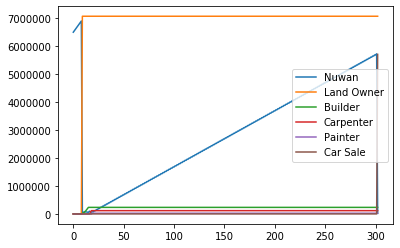

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(wealth[0],label='Nuwan')
plt.plot(wealth[1],label='Land Owner')
plt.plot(wealth[2],label='Builder')
plt.plot(wealth[3],label='Carpenter')
plt.plot(wealth[4],label='Painter')
plt.plot(wealth[5],label='Car Sale')
plt.legend(loc = 7)